In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from dataset import Dataset
dataset = Dataset()

In [13]:
def get_image(patch, index):
    """
    Arguments:
      patch: patch image
      index: 0,1,2      
    """
    x = 5*index
    return patch[:, x:x+16].reshape([-1])

In [14]:
print(len(dataset.patches))
print(np.std(dataset.patches))
print(np.mean(dataset.patches))

2375
2.1438892
-0.0016897094


In [46]:
#k1 = 0.5
#k2 = 1.0

k1 = 0.5 # rの学習率
k2 = 0.1 # Uの学習率

U_scale = 1.0
I_scale = 1.0

#sigma_sq    = 1.0 # Iの生成観測分布の分散
sigma_sq    = 30.0 # Iの生成観測分布の分散
sigma_sq_td = 10.0 # rの生成観測分布の分散
alpha1      = 1.0 # rの事前分布の精度パラメータ (分散の逆数)
alpha2      = 0.05 # r_tdの事前分布の精度パラメータ (分散=20.0, 標準偏差4.5)
lambd       = 0.02 # Uの事前分布の精度パラメータ　(分散=50.0, 標準偏差7.1)

#iteration = 40
iteration = 10

Us = (np.random.rand(3,256,32)-0.5) * U_scale
rs = np.zeros([3, 32], dtype=np.float32)

results = []
errors = []

patch_size = len(dataset.patches) # 2375

for k in range(patch_size):
    patch = dataset.patches[k]    
    rs = np.zeros([3, 32], dtype=np.float32)
    
    for i in range(iteration):
        for j in range(3):
            I = get_image(patch, j) * I_scale            
            r = rs[j]
            U = Us[j]
            Ur = U.dot(r)
            error = I - Ur
            dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
            dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
            rs[j] += dr
            Us[j] += dU
    
    if k % 100 == 0:
        print("us mean={} std={}".format(np.mean(Us[0]), np.std(Us[0])))                                    
        print("rs mean={} std={}".format(np.mean(rs), np.std(rs)))
    
    if k % 40 == 0:
        k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        

us mean=-0.0006252871889384771 std=0.2849499131489245
rs mean=-8.838867386756817e-18 std=3.344200689905653e-16
us mean=-0.0001065132237137032 std=0.040745376727198516
rs mean=0.00023794737353455275 std=0.0024161250330507755
us mean=-2.04867758478556e-05 std=0.006316597395037546
rs mean=0.00014598954294342548 std=0.00214514066465199
us mean=-3.25855731752351e-06 std=0.0010589241472993673
rs mean=1.5280988009180874e-05 std=0.0004934690077789128
us mean=1.0888789427267978e-06 std=0.00019190528109300177
rs mean=-1.133633762916431e-21 std=5.382420301912509e-19
us mean=1.6981304293752543e-07 std=3.689977217301983e-05
rs mean=-6.576991040674329e-07 std=1.0621680303302128e-05
us mean=0.0016867237964704532 std=0.04674399350915857
rs mean=0.004092369228601456 std=0.1861761212348938
us mean=-0.007400890773998328 std=0.169159065942575
rs mean=-0.005979830399155617 std=0.33910152316093445
us mean=-0.0016732336385759847 std=0.20611864382304754
rs mean=-0.0012036679545417428 std=0.262884259223938
us 

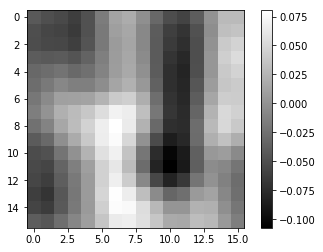

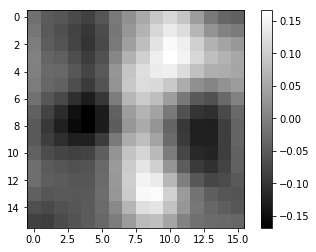

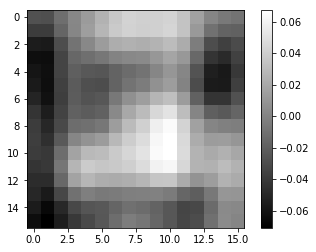

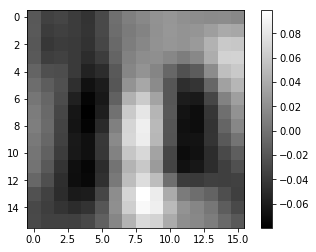

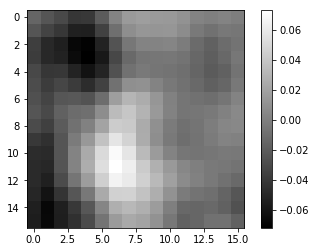

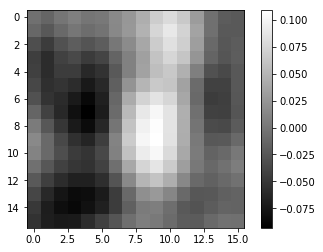

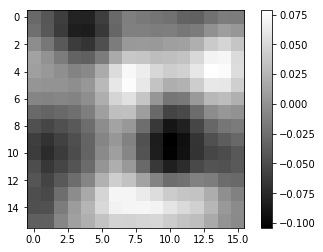

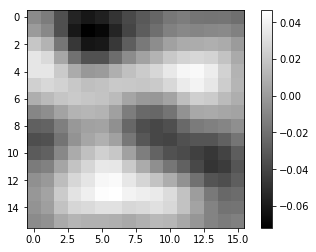

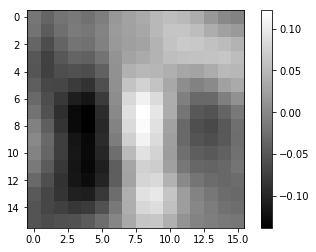

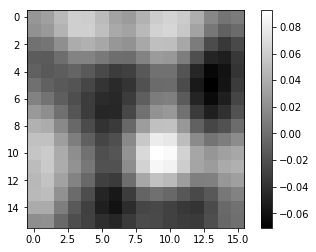

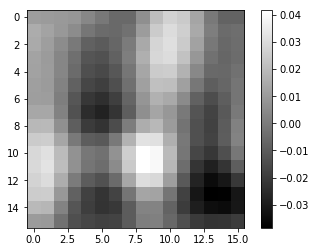

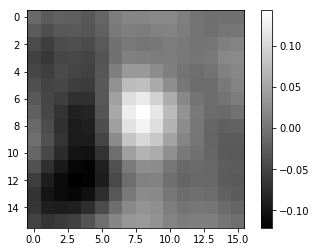

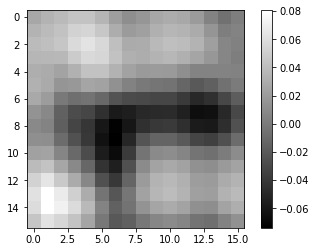

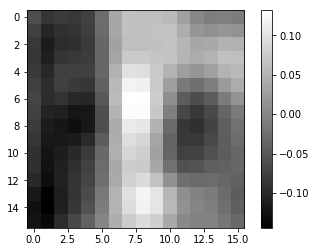

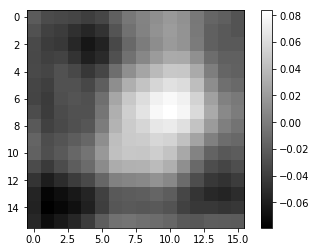

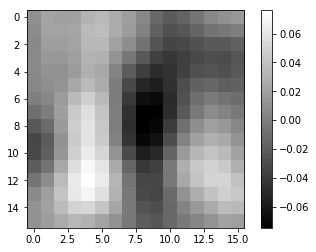

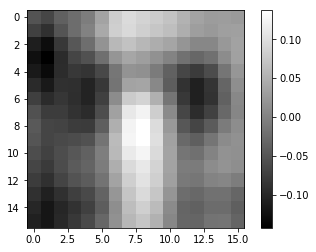

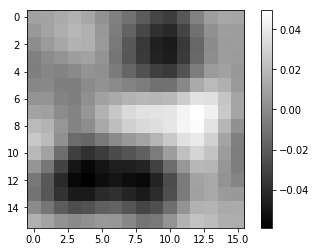

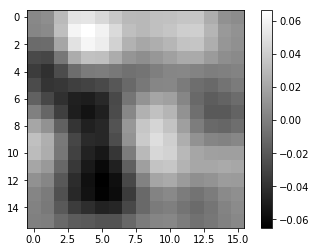

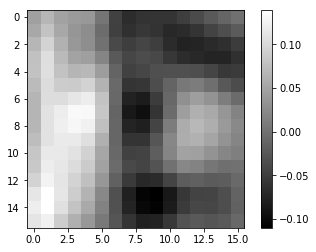

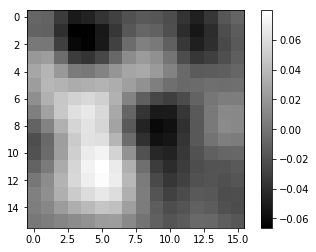

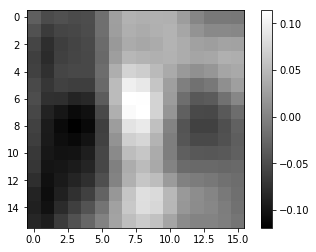

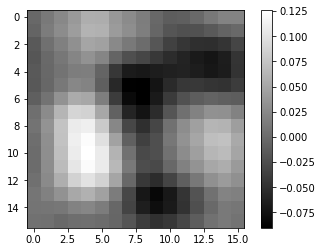

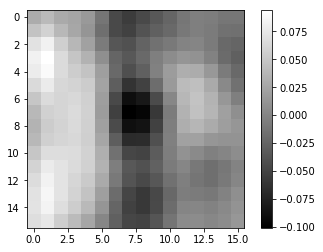

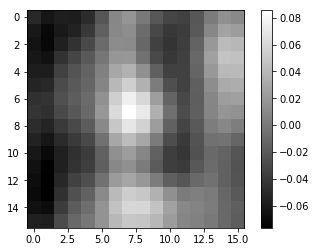

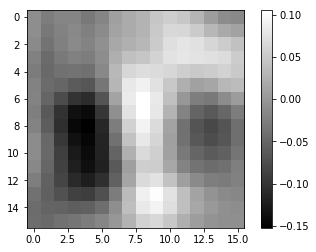

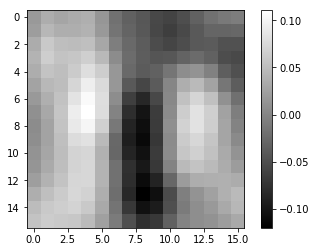

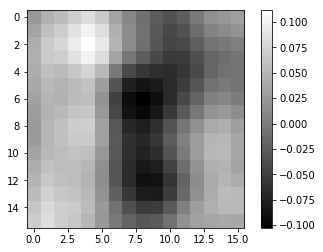

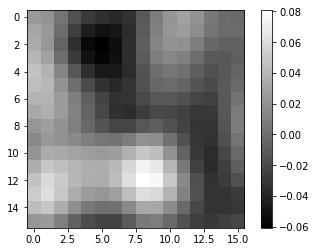

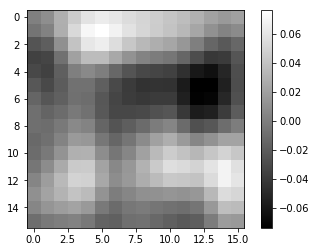

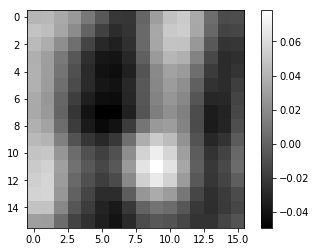

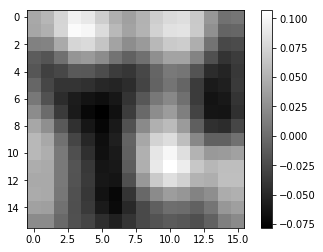

In [19]:
for i in range(32):
    u = Us[1][:,i].reshape(16,16)
    plt.figure()
    plt.imshow(u, cmap='gray')
    plt.colorbar()
    plt.show()

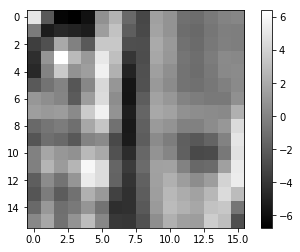

In [7]:
patch = dataset.patches[500]
for j in range(3):
    I = get_image(patch, j) * I_scale 
    
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

## 再構成の確認

[-0.47019055  1.5496615   0.5302081   1.6486387  -0.9016928  -0.23098747
  0.04827519  1.443662   -0.6245614  -1.7473234   1.0039966   1.7152454
  0.4887902  -0.7690666   0.9301451  -0.08051343 -0.21200807 -1.5857577
  0.17078955 -0.27764457 -1.240254   -1.0796167   0.09875258  0.1747647
  1.403224   -0.98505497 -0.98717296  0.50001615  0.7912631   1.3534249
  0.9678689  -0.9990475 ]
[-0.47019055  1.5496615   0.5302081   1.6486387  -0.9016928  -0.23098747
  0.04827519  1.443662   -0.6245614  -1.7473234   1.0039966   1.7152454
  0.4887902  -0.7690666   0.9301451  -0.08051343 -0.21200807 -1.5857577
  0.17078955 -0.27764457 -1.240254   -1.0796167   0.09875258  0.1747647
  1.403224   -0.98505497 -0.98717296  0.50001615  0.7912631   1.3534249
  0.9678689  -0.9990475 ]


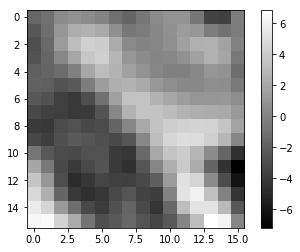

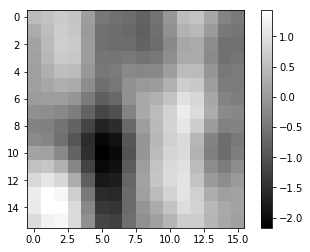

In [45]:
image_index = 600
patch = dataset.patches[image_index]
rs = np.zeros([3, 32], dtype=np.float32)

for i in range(10):
    j = 0
    I = get_image(patch, j) * I_scale            
    r = rs[j]
    U = Us[j]
    Ur = U.dot(r)
    error = I - Ur
    #dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
    dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * 0.000001 * r
    rs[j] += dr
    
print(rs[j])

U = Us[j]
#r = U.T.dot(I)
r = rs[j]

print(r)

I_rec = U.dot(r)

plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(I_rec.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

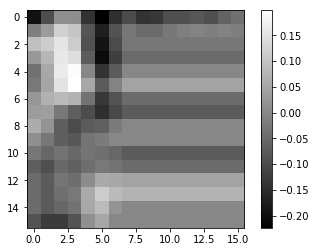

In [20]:
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()